In [9]:
from scipy.integrate import odeint
import numpy as np
import math
import matplotlib.pyplot as plt

def convert(g):
    return g/57.2958

def gerarlistas(x,x1):
    lista=[]
    for i in range(x,x1+1):
        lista.append(i)
    return(lista)
def gerarlistaL(x,y):
    lista=[]
    for i in range(x):
        lista.append(y)
    return lista

t=np.arange(0,500,0.1)
pho=1.225
Cd=0.05
A=0.002
m=0.5
k=1300
x=0.8

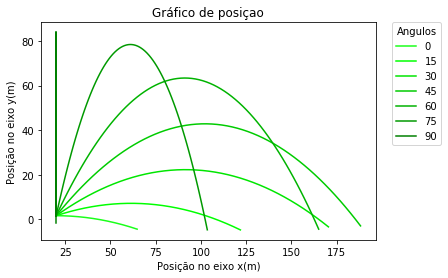

In [19]:
angulos=[[0,"#1aff1a"],[15,"#00ff00"],[30,"#00e600"],[45,"#00cc00"],[60,"#00b300"],
     [75,"#009900"],[90,"#008000"]]
def EqDifArrasto(S, t):
    X=S[0]
    Y=S[1]
    Vx=S[2]
    Vy=S[3]

    V=math.sqrt(Vx**2+Vy**2)
    seno=Vy/V
    cosseno=Vx/V
    Arrasto=(1/2)*pho*V**2*Cd*A
    Arrastox=Arrasto*cosseno
    Arrastoy=Arrasto*seno
    dXdt=Vx
    dYdt=Vy
    dVxdt=-Arrastox/m
    dVydt=-10-Arrastoy/m
    return [dXdt, dYdt, dVxdt, dVydt]
listateste=[]
for i in angulos:
    lista=[]
    lista2=[]
    S0=[20,1.6,math.sqrt((k*(x**2))/m)*math.cos(convert(i[0])),math.sqrt((k*(x**2))/m)*math.sin(convert(i[0]))]
    SArrasto=odeint(EqDifArrasto, S0, t)

    for j in range(len(SArrasto[:,1])):
        if SArrasto[:,1][j]>=0:
            listateste.append(SArrasto[:,1][j])
            lista.append(SArrasto[:,1][j])
            lista2.append(SArrasto[:,0][j])
        else:
            pass
        
    plt.plot(lista2,lista,label="{}".format(i[0]),c=i[1])
plt.legend(bbox_to_anchor=(1.05,1),title="Angulos",loc=2,borderaxespad=0.)
plt.xlabel("Posição no eixo x(m)")
plt.ylabel("Posição no eixo y(m)")
plt.title("Gráfico de posiçao")
plt.show()



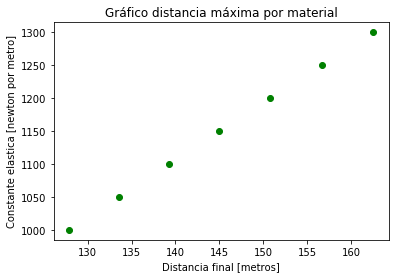

In [3]:
forcas=[1000,1050,1100,1150,1200,1250,1300]
xfinal=[]
for i in forcas:
    lista2=[]
    S0=[0,1.6,math.sqrt((i*(x**2))/m)*math.cos(convert(45)),math.sqrt((i*(x**2))/m)*math.sin(convert(45))]
    SArrasto=odeint(EqDifArrasto, S0, t)
    for j in range(len(SArrasto[:,1])):
        if SArrasto[:,1][j]>0:
            lista2.append(SArrasto[:,0][j])
        else:
            pass
    xfinal.append(lista2[(len(lista2))-1])

plt.xlabel("Distancia final [metros]")
plt.ylabel("Constante elastica [newton por metro]")
plt.title("Gráfico distancia máxima por material")
plt.plot(xfinal,forcas,"go")
plt.show()   

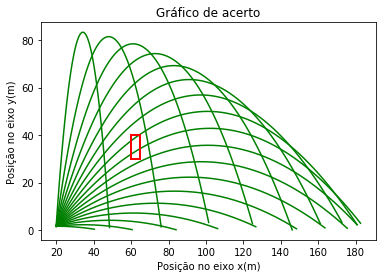

In [16]:
listax=gerarlistas(60,65)
listay=gerarlistas(30,40)
limitex1=gerarlistaL(len(listax),30)
limitex2=gerarlistaL(len(listax),40)
limitey=gerarlistaL(len(listay),60)
limitey2=gerarlistaL(len(listay),65)
def EqDifArrasto(S, t):
    X=S[0]
    Y=S[1]
    Vx=S[2]
    Vy=S[3]

    V=math.sqrt(Vx**2+Vy**2)
    seno=Vy/V
    cosseno=Vx/V
    Arrasto=(1/2)*pho*V**2*Cd*A
    Arrastox=Arrasto*cosseno
    Arrastoy=Arrasto*seno
    

    dXdt=Vx
    dYdt=Vy
    dVxdt=-Arrastox/m
    dVydt=-10-Arrastoy/m
    return [dXdt, dYdt, dVxdt, dVydt]
angulos=[]
for i in range(0,90,5):
    lista=[]
    lista2=[]
    lista3=[]
    S0=[20,1.6,math.sqrt((k*(x**2))/m)*math.cos(convert(i)),math.sqrt((k*(x**2))/m)*math.sin(convert(i))]
    SArrasto=odeint(EqDifArrasto, S0, t)

    for j in range(len(SArrasto[:,1])):
        if SArrasto[:,1][j]>0:
            lista.append(SArrasto[:,1][j])
            lista2.append(SArrasto[:,0][j])
        else:
            pass

    plt.plot(lista2,lista,"g")
    plt.plot(listax,limitex1,"r")
    plt.plot(listax,limitex2,"r")
    plt.plot(limitey,listay,"r")
    plt.plot(limitey2,listay,"r")
    
    for p in range(len(lista)):
        if 30<SArrasto[:,1][p]<40 and 60<SArrasto[:,0][p]<65 :
            angulos.append(i)
            
plt.title("Gráfico de acerto")
plt.xlabel("Posição no eixo x(m)")
plt.ylabel("Posição no eixo y(m)")
plt.show()



In [5]:
print(angulos)

[40, 45]


In [22]:
print(teste(45))

[ 1.6]
